<a href="https://colab.research.google.com/github/saumay3105/PBL-2/blob/main/PBL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from google.colab import files
uploaded = files.upload()

Saving COVIDSenti-A.csv to COVIDSenti-A.csv


In [14]:
twitter_data = pd.read_csv('COVIDSenti-A.csv')
twitter_data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [15]:
twitter_data.shape

(30000, 2)

In [16]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [17]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [18]:
twitter_data['label'].value_counts()

,count
label,
neu,22949
neg,5083
pos,1968


In [19]:
# 0-> neutral, 1-> positive 2-> negative
twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})

print(twitter_data['label'].value_counts())

label
0    22949
2     5083
1     1968
Name: count, dtype: int64


<ipython-input-19-e3ad959fbf97>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})


In [20]:
port_stem = PorterStemmer()

In [21]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [22]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)
twitter_data.head()

,tweet,label,stemmed_content
0,Coronavirus | Human Coronavirus Types | CDC ht...,0,coronaviru human coronaviru type cdc http co i...
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",0,shehryar taseer true corona viru swine flue bi...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",2,tldr sar possibl new coronaviru difficult conf...
3,Disease outbreak news from the WHO: Middle Eas...,0,diseas outbreak news middl east respiratori sy...
4,China - Media: WSJ says sources tell them myst...,0,china media wsj say sourc tell mysteri pneumon...


In [23]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['label'].values

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(30000,) (24000,) (6000,)


In [26]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [27]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [28]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8516666666666667


In [29]:
predictions_train = model.predict(X_train)
print(accuracy_score(Y_train, predictions_train))

0.887875


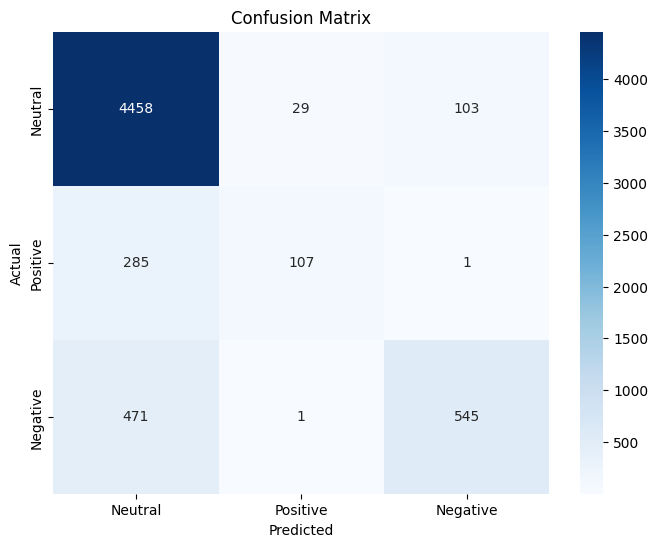

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, predictions)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(3, activation='softmax')  # Output layer with softmax for multi-class
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) # Get the class with highest probability

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.7791 - loss: 0.6564 - val_accuracy: 0.8712 - val_loss: 0.3988
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9433 - loss: 0.1704 - val_accuracy: 0.8612 - val_loss: 0.4403
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9890 - loss: 0.0407 - val_accuracy: 0.8529 - val_loss: 0.5380
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 55s 81ms/step - accuracy: 0.9969 - loss: 0.0125 - val_accuracy: 0.8529 - val_loss: 0.6798
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.8467 - val_loss: 0.7112
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 55s 82ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.8475 - val_loss: 0.7626
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.9999 - loss: 5.4357e-04 - val_accuracy: 0.8396 - val_loss: 0.7986
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 1.0000 - loss: 1.733

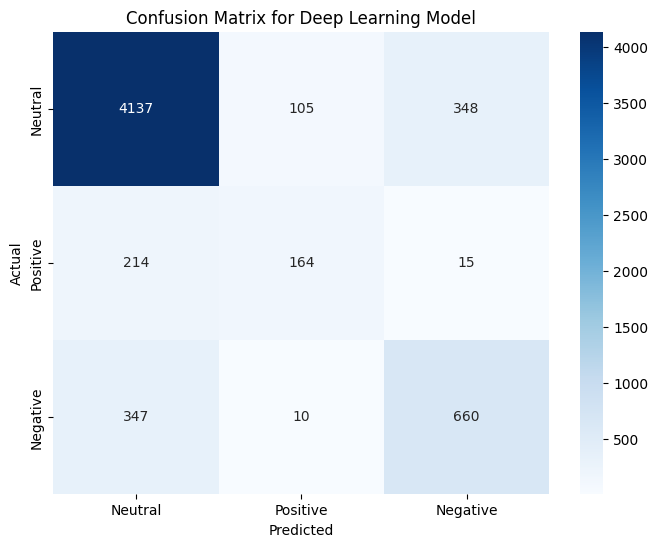

In [32]:
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

SVM Accuracy: 0.874


Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

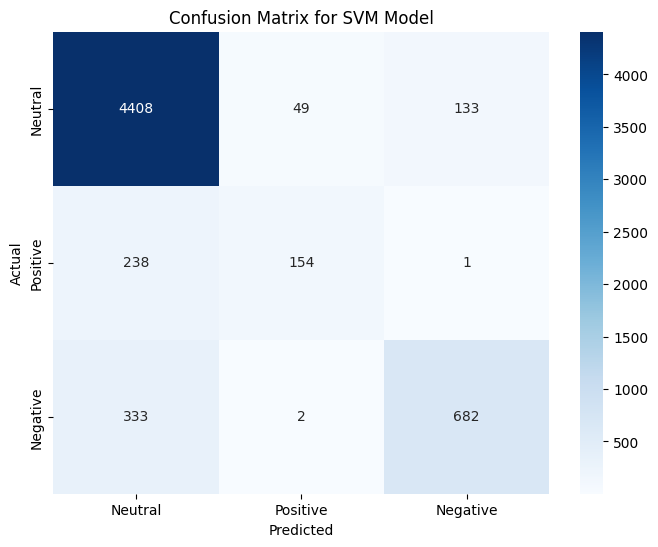

In [33]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
svm_cm = confusion_matrix(Y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')

Using lemmatization instead of Stemming


In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
def lemmatization(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [38]:
twitter_data['lemmed_content'] = twitter_data['tweet'].apply(lemmatization)
twitter_data.head()

,tweet,label,stemmed_content,lemmed_content
0,Coronavirus | Human Coronavirus Types | CDC ht...,0,coronaviru human coronaviru type cdc http co i...,coronavirus human coronavirus type cdc http co...
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",0,shehryar taseer true corona viru swine flue bi...,shehryar taseer true corona virus swine flue b...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",2,tldr sar possibl new coronaviru difficult conf...,tldr sars possibly new coronavirus difficult c...
3,Disease outbreak news from the WHO: Middle Eas...,0,diseas outbreak news middl east respiratori sy...,disease outbreak news middle east respiratory ...
4,China - Media: WSJ says sources tell them myst...,0,china media wsj say sourc tell mysteri pneumon...,china medium wsj say source tell mystery pneum...


In [39]:
X_lem = twitter_data['lemmed_content'].values
Y_lem = twitter_data['label'].values

In [40]:
X_train_lem, X_test_lem, Y_train_lem, Y_test_lem = train_test_split(X_lem,Y_lem, test_size=0.2, stratify=Y, random_state=2)

In [41]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_lem)

X_train_lem = vectorizer.transform(X_train_lem)
X_test_lem = vectorizer.transform(X_test_lem)

In [42]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_lem, Y_train_lem)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [43]:
predictions_lem = model.predict(X_test_lem)
print(accuracy_score(Y_test_lem, predictions_lem))


0.8566666666666667


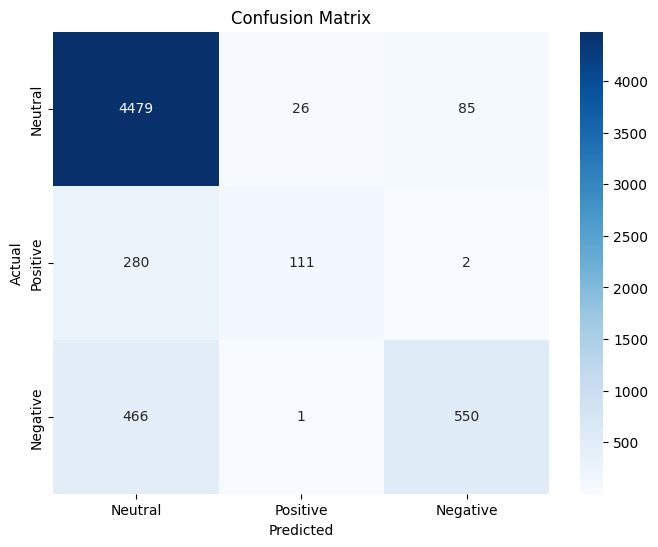

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test_lem, predictions_lem)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()